<a href="https://colab.research.google.com/github/BieeRamy/Dataset/blob/main/bank_churn_data_exploration_and_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="background-color:orange;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table Of Content</h1>


* [1. Introduction](#1)
    * [1.1 Libraries And Utilities](#1.1)
    * [1.2 Data Loading](#1.2)
* [2. Exploratory Data Analysis(EDA)](#2)
* [3. Data Preprocessing](#3)
    * [3.1 Data Upsampling Using SMOTE](#3.1)
    * [3.2 Principal Component Analysis Of One Hot Encoded Data](#3.2)  
* [4. Model Selection And Evaluation](#4)
    * [4.1 Cross Validation](#4.1)
    * [4.2 Model Evaluation](#4.2)
    * [4.3 Model Evaluation On Original Data (Before Upsampling)](#4.3)
* [5. Results](#5)


<a id="1.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h3>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
# import scikitplot as skplt

#plt.rc('figure',figsize=(18,9))
#%pip install imbalanced-learn
#from imblearn.over_sampling import SMOTE

<a id="1.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Data Loading</h3>


In [4]:
# 1️⃣ Install Kaggle API
!pip install kaggle

# 2️⃣ Upload your Kaggle API key (kaggle.json)
from google.colab import files
files.upload()  # 👉 Choose kaggle.json from your computer

# 3️⃣ Configure Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 4️⃣ Download the dataset from Kaggle
!kaggle datasets download -d sakshigoyal7/credit-card-customers

# 5️⃣ Unzip the dataset
!unzip -o credit-card-customers.zip

# 6️⃣ Load the CSV into pandas
import pandas as pd
df = pd.read_csv('BankChurners.csv')  # file inside the zip
df.head(2)


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
License(s): CC0-1.0
  0% 0.00/379k [00:00<?, ?B/s]
100% 379k/379k [00:00<00:00, 750MB/s]
Archive:  credit-card-customers.zip
  inflating: BankChurners.csv        


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   

[2 rows x 23 columns]

<a id="2"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis</h1>


In [12]:
# View first 5 rows
print(df.head())

# Dataset info (types, missing values)
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for categorical columns
print(df.describe(include='object'))

# Check for missing values
print(df.isnull().sum())


   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

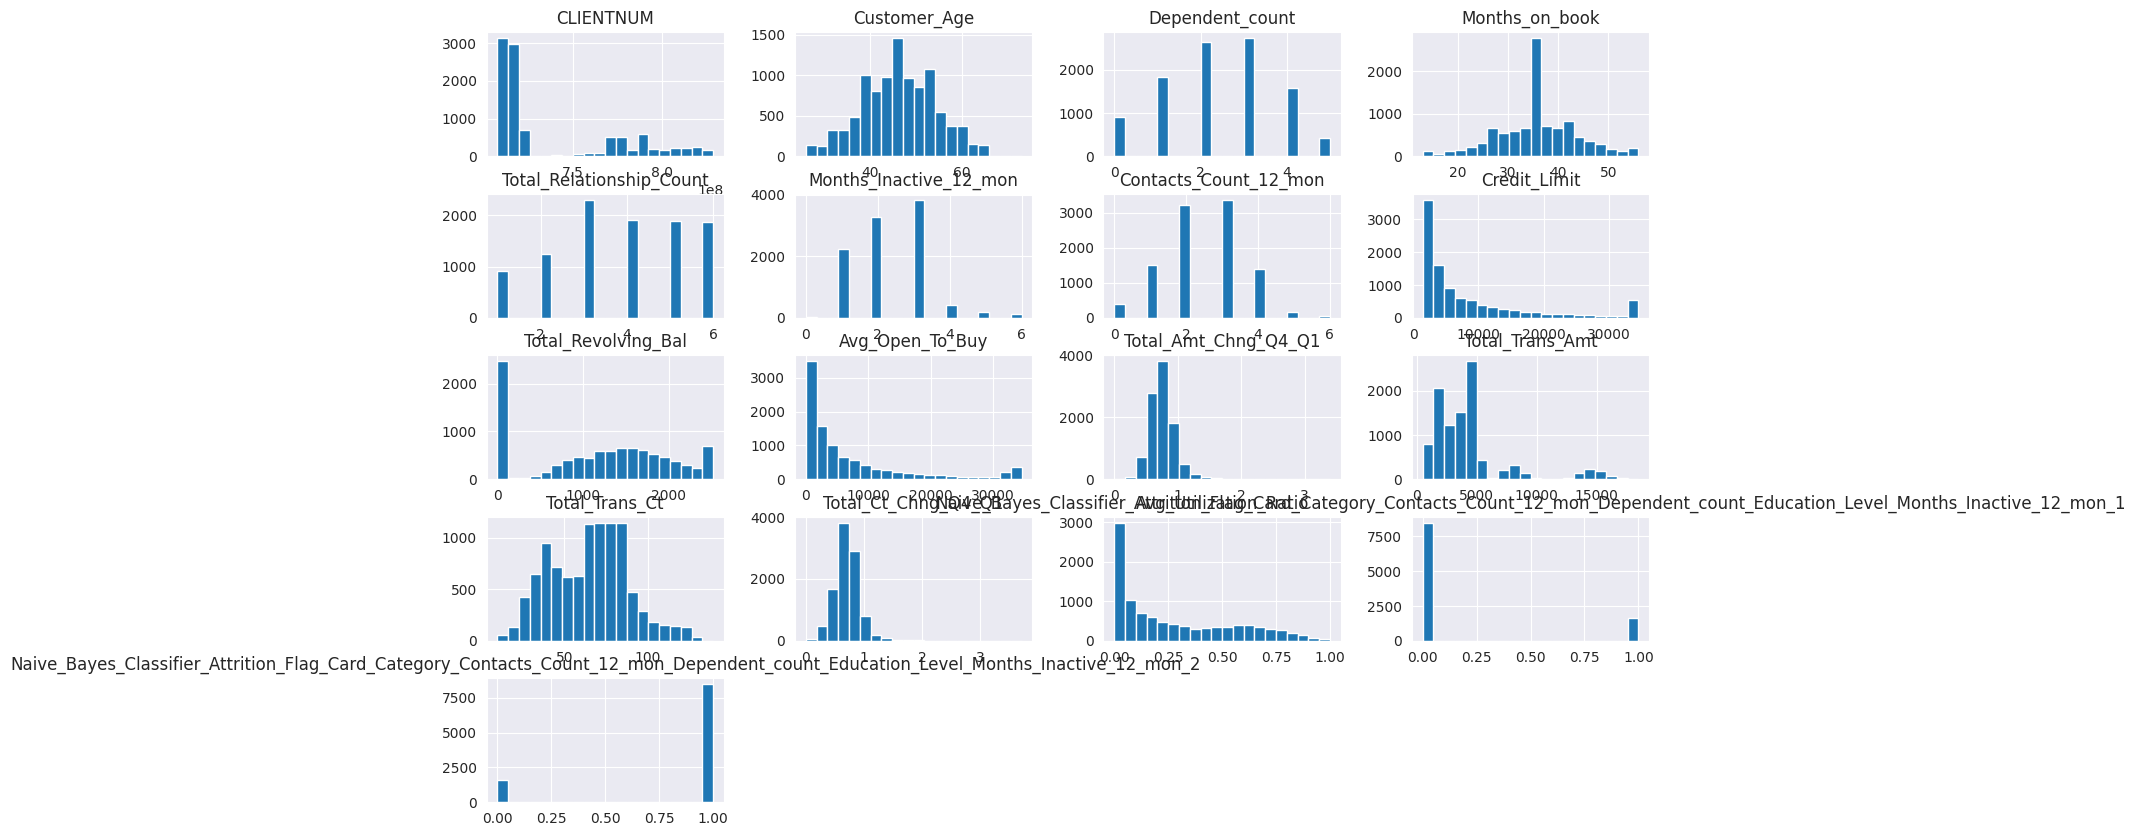

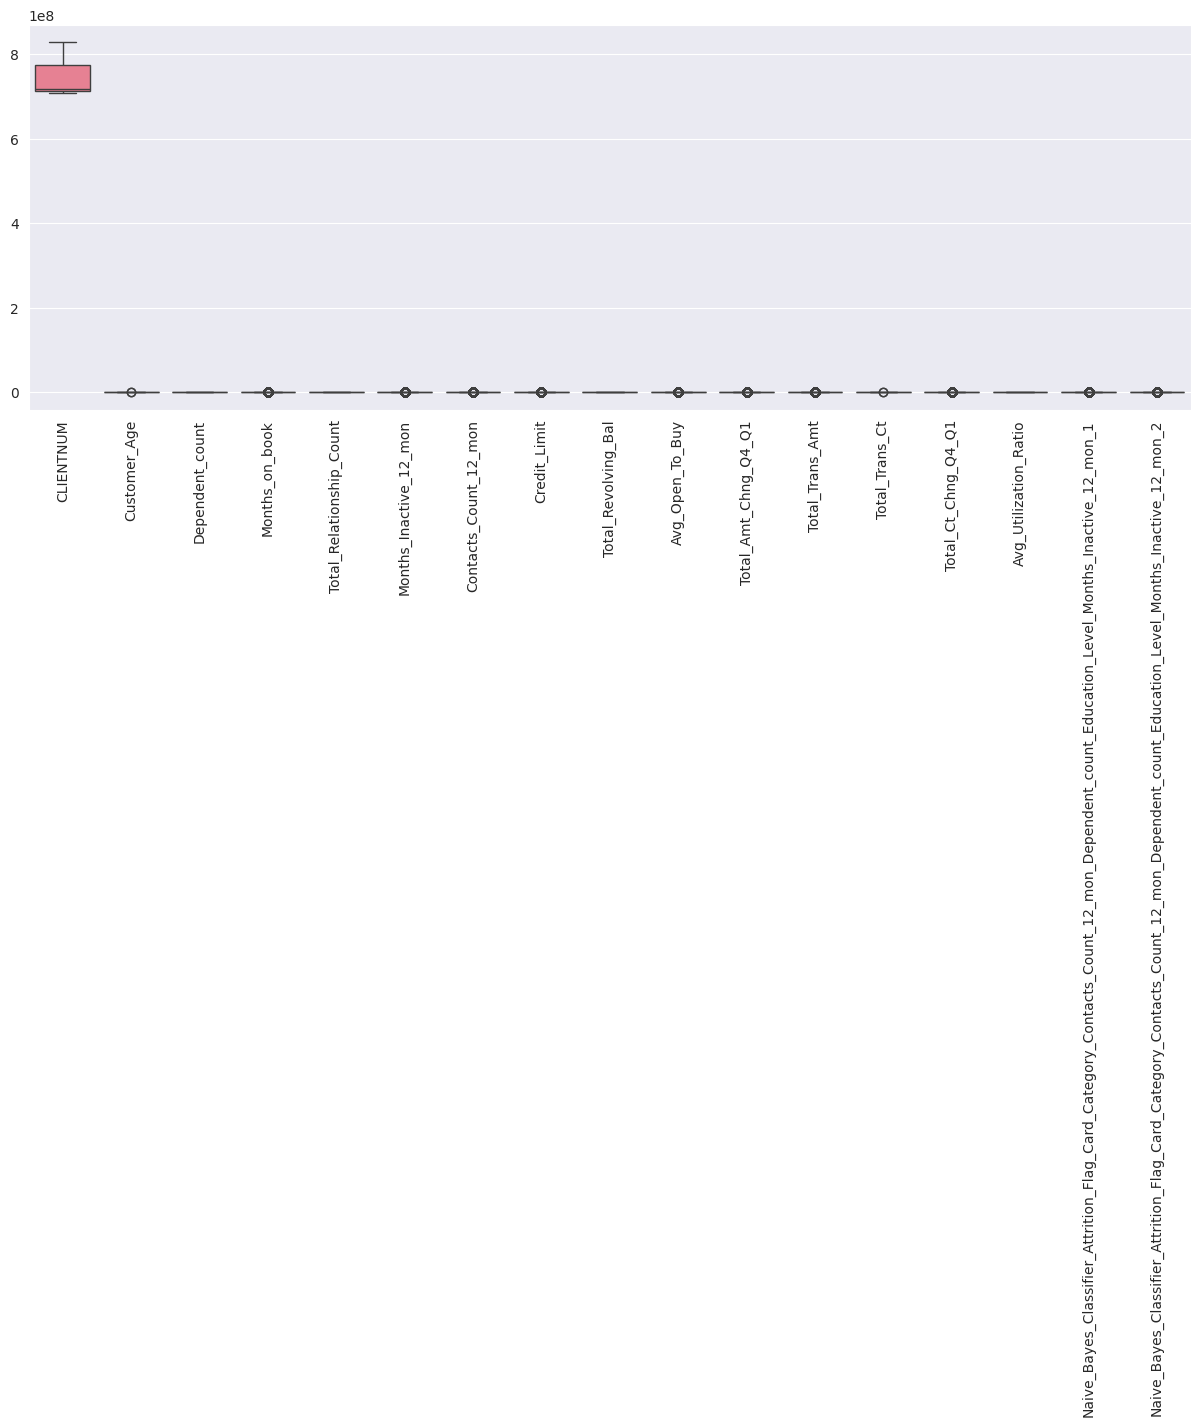

In [13]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Histograms
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.show()

# Boxplots for outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.show()


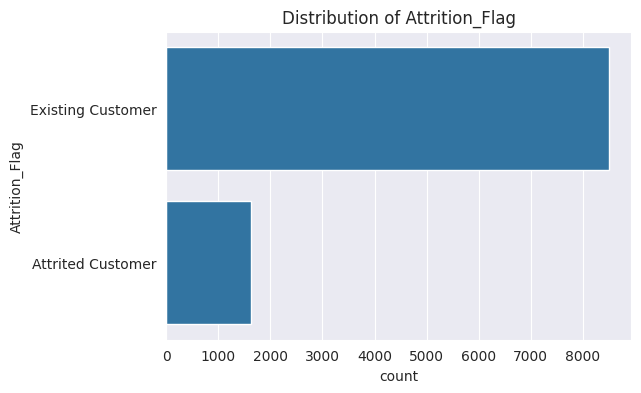

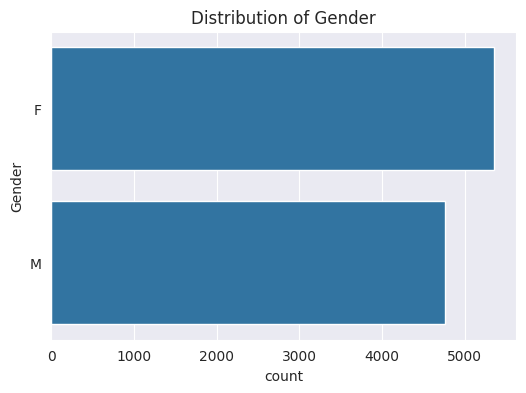

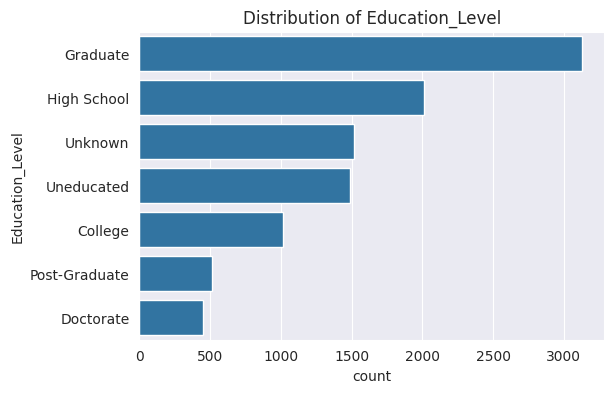

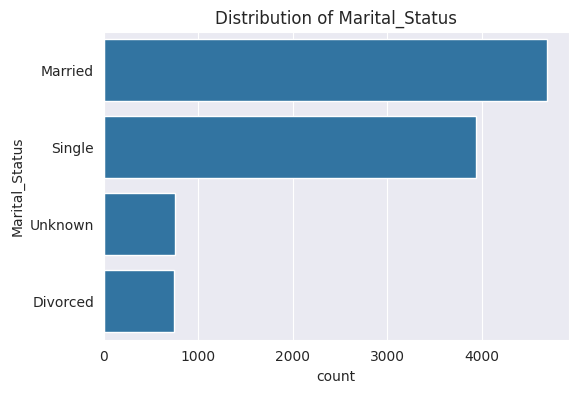

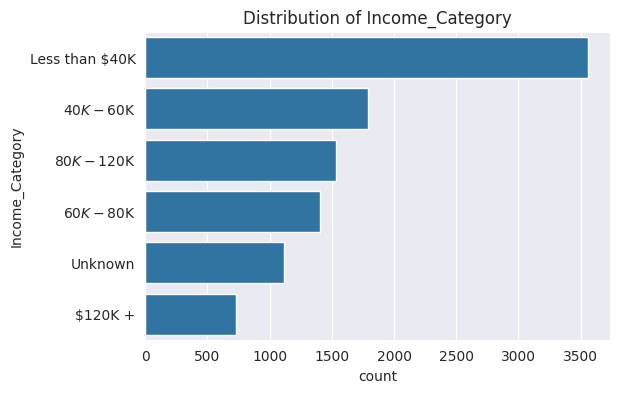

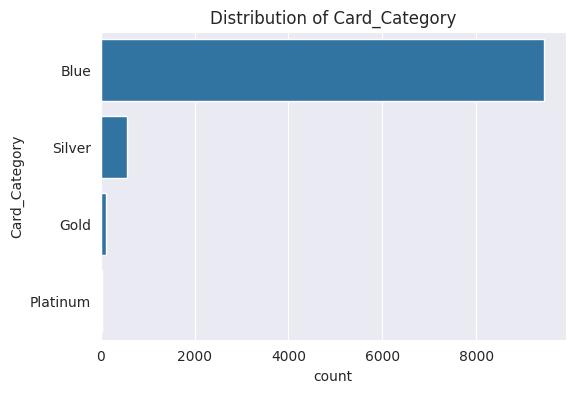

In [14]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()


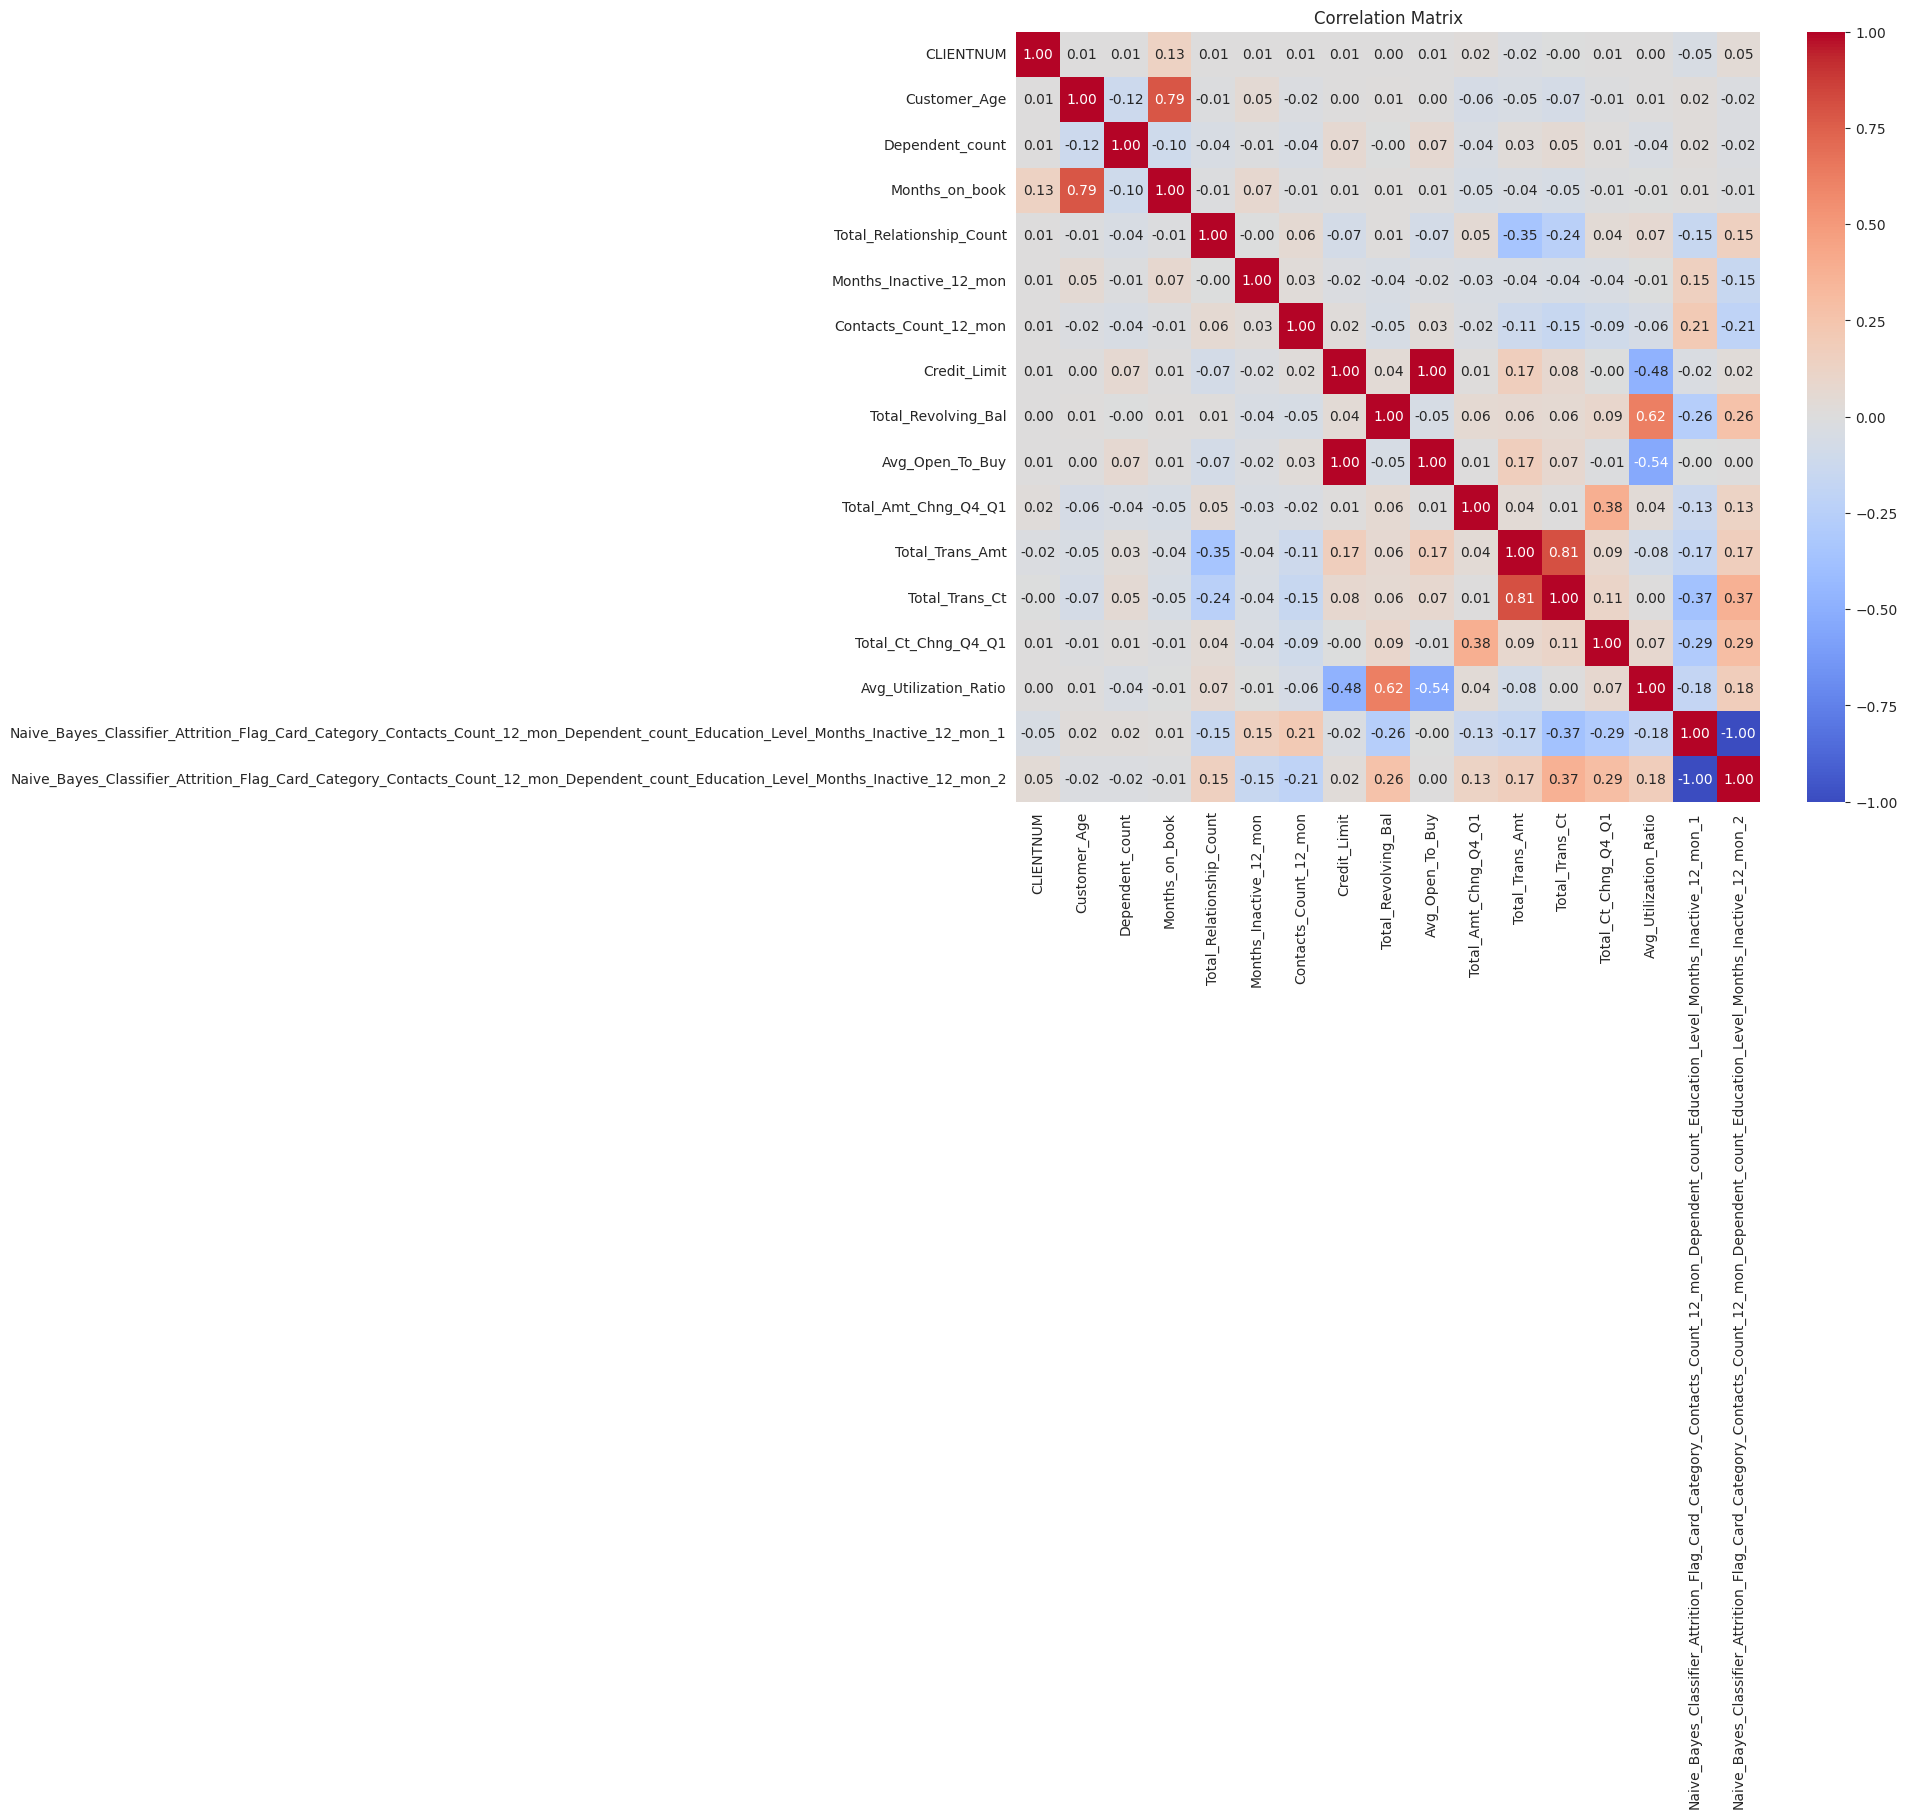

In [15]:
# Compute correlation matrix
corr = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


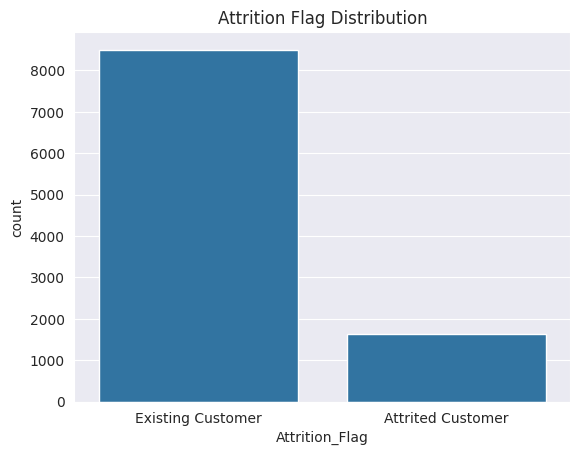

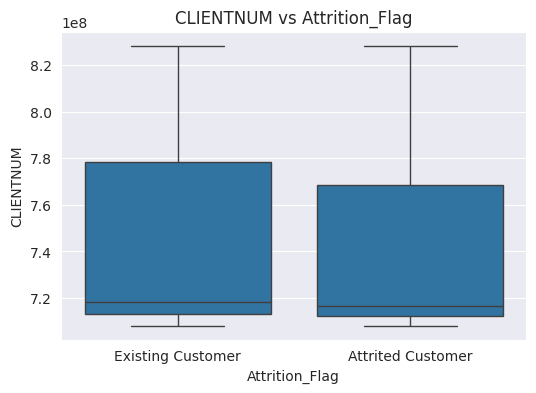

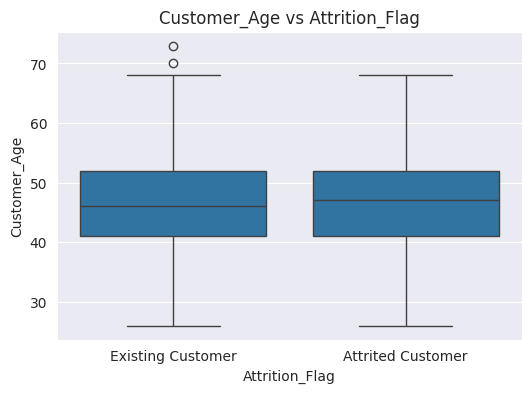

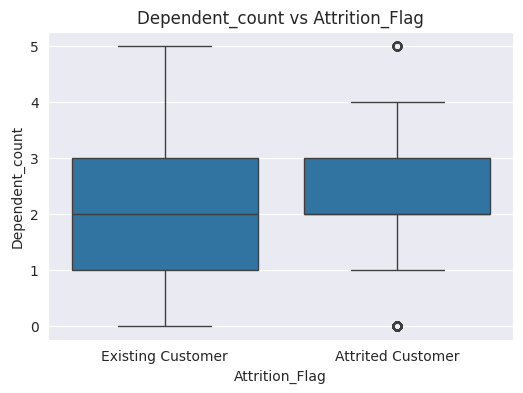

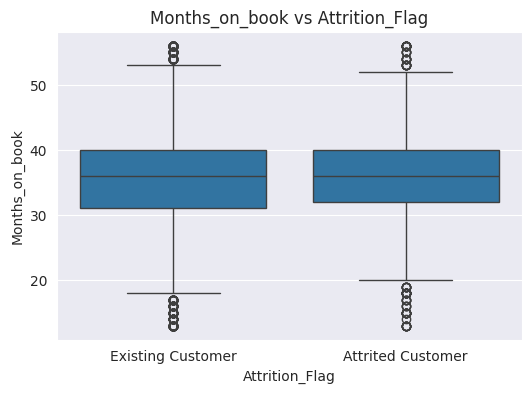

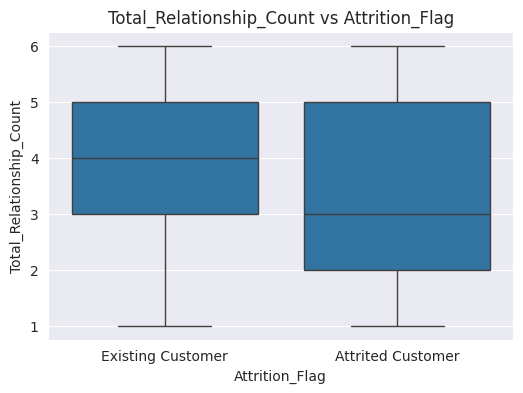

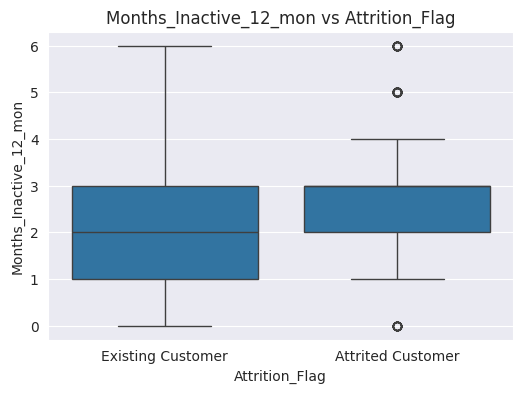

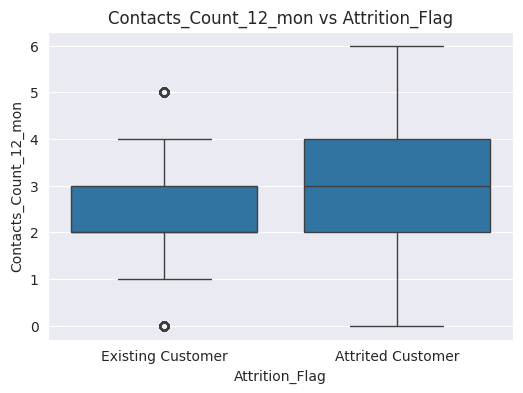

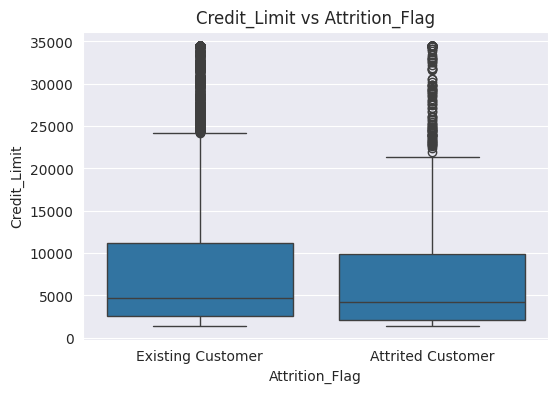

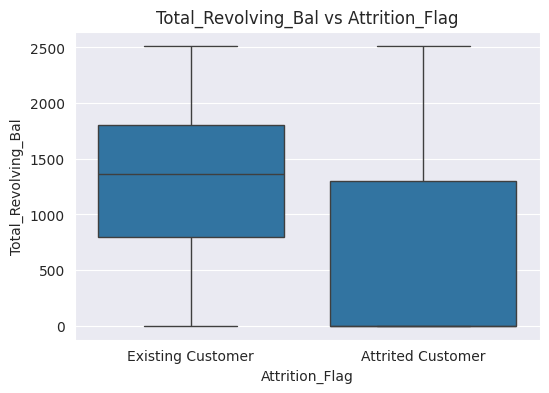

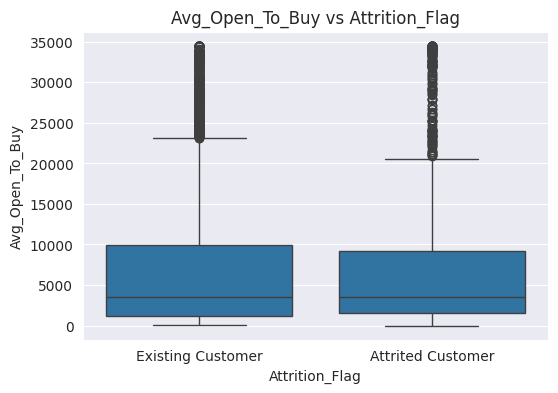

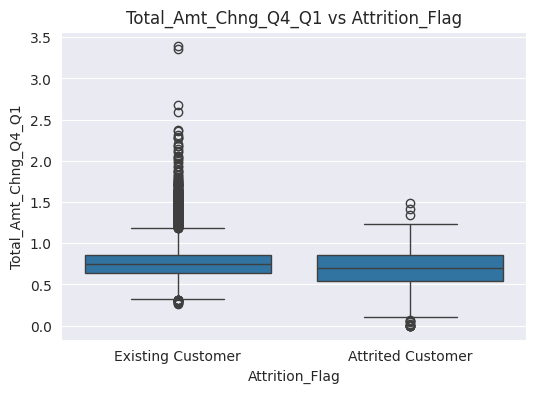

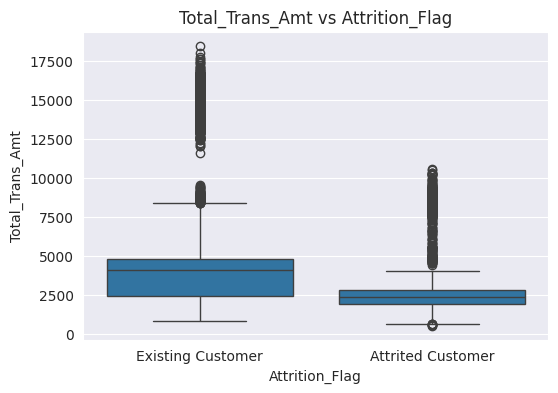

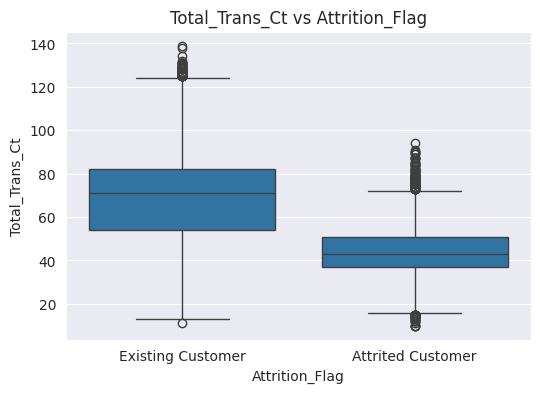

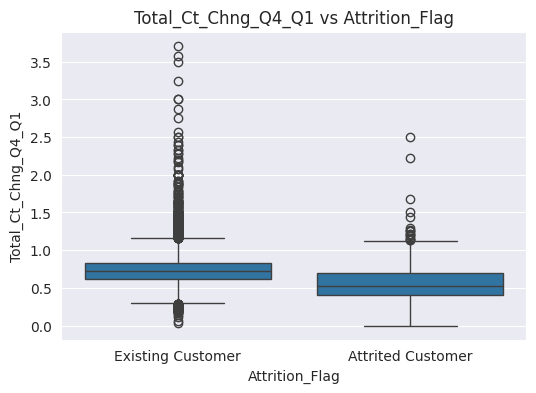

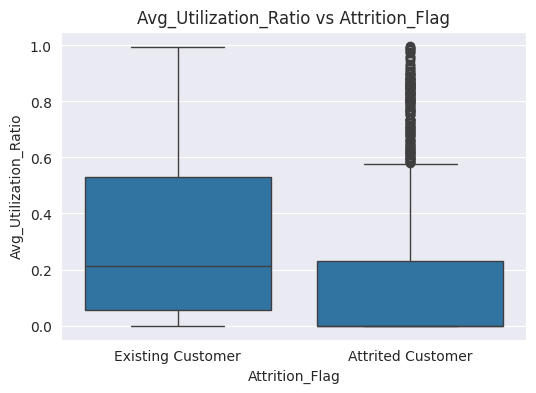

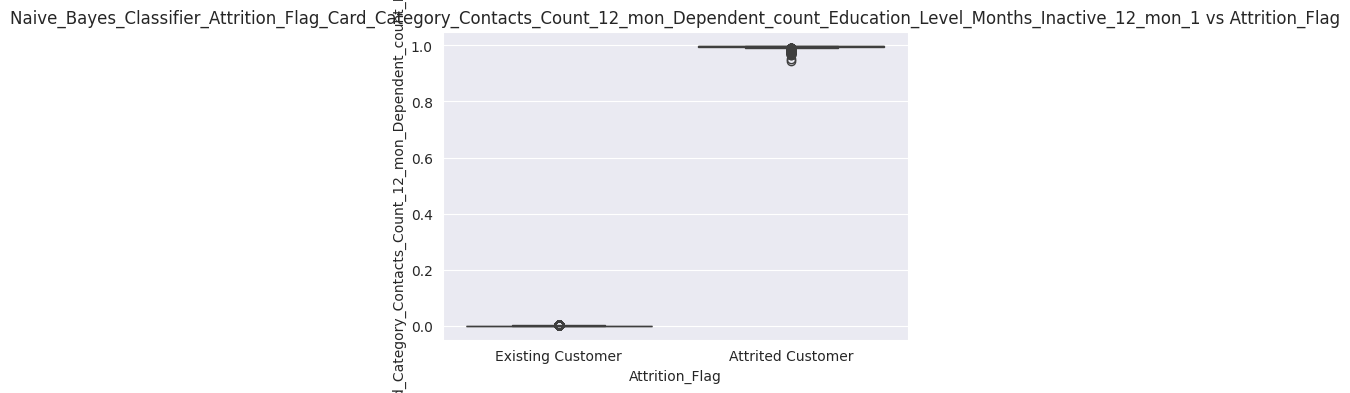

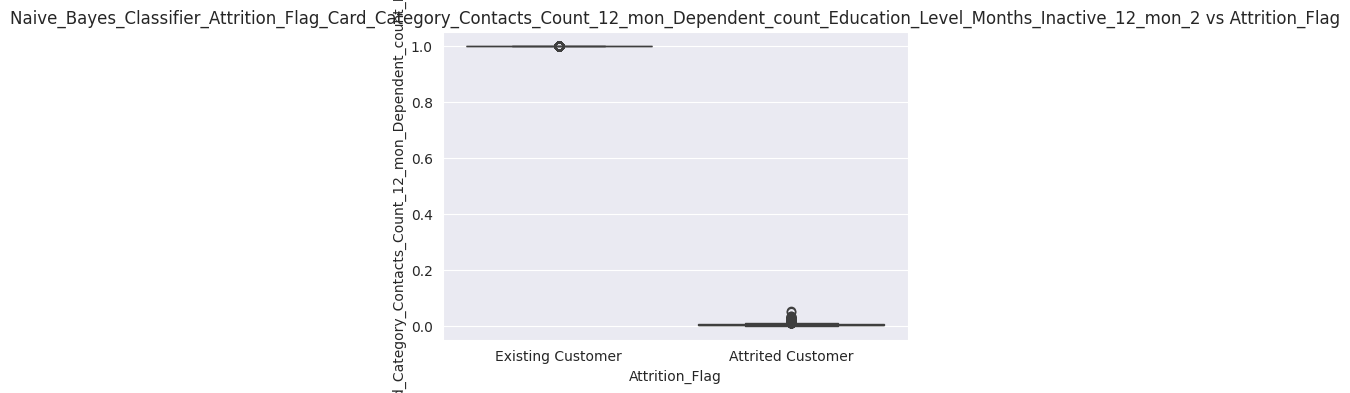

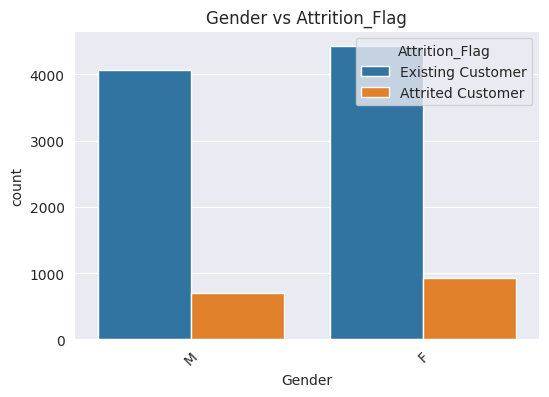

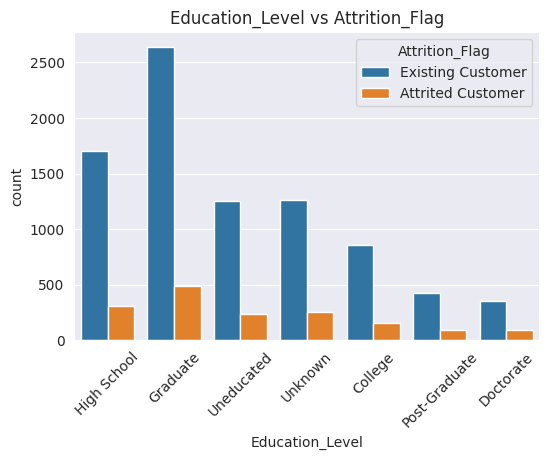

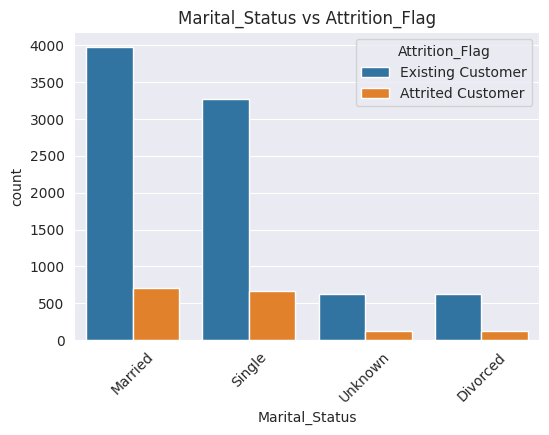

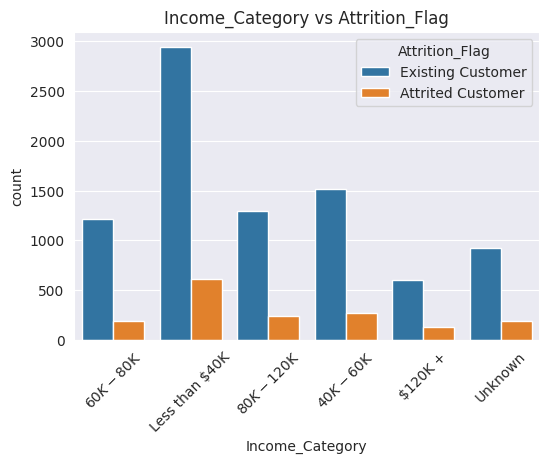

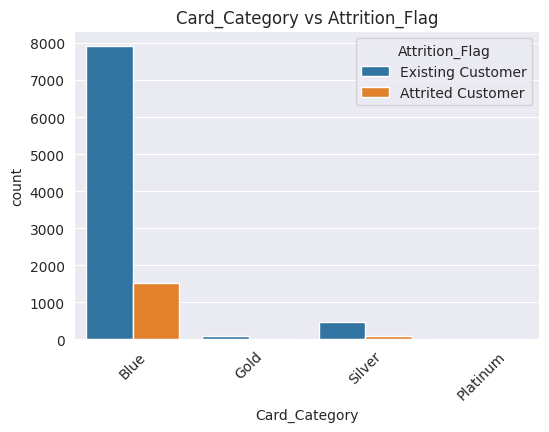

In [16]:
# Count of target
sns.countplot(data=df, x='Attrition_Flag')
plt.title('Attrition Flag Distribution')
plt.show()

# Attrition vs numerical features
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Attrition_Flag', y=col, data=df)
    plt.title(f'{col} vs Attrition_Flag')
    plt.show()

# Attrition vs categorical features
for col in categorical_cols:
    if col != 'Attrition_Flag':
        plt.figure(figsize=(6,4))
        sns.countplot(x=col, hue='Attrition_Flag', data=df)
        plt.title(f'{col} vs Attrition_Flag')
        plt.xticks(rotation=45)
        plt.show()


In [17]:
print(f'Duplicate rows: {df.duplicated().sum()}')


Duplicate rows: 0
